## Titanic Dataset

The dataset containing  information about passengers on the Titanic, including features such as age, sex, ticket class, number of siblings/spouses aboard, number of parents/children aboard, fare, and more, the task is to build a predictive model that can accurately classify whether a passenger survived (1) or did not survive (0) 

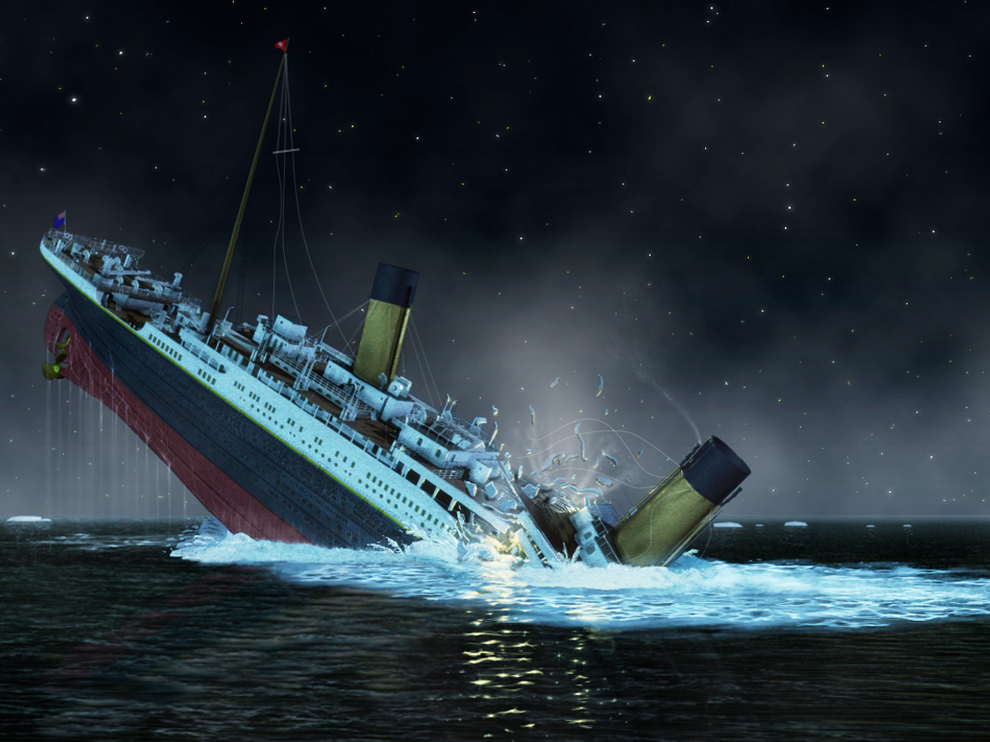

Below is a brief information about each columns of the dataset:

1. **PassengerId:** An unique index for passenger rows. It starts from 1 for first row and increments by 1 for every new rows.

2. **Survived:** Shows if the passenger survived or not. 1 stands for survived and 0 stands for not survived.

3. **Pclass:** Ticket class. 1 stands for First class ticket. 2 stands for Second class ticket. 3 stands for Third class ticket.

4. **Name:** Passenger's name. Name also contain title. "Mr" for man. "Mrs" for woman. "Miss" for girl. "Master" for boy.

5. **Sex:** Passenger's sex. It's either Male or Female.

6. **Age:** Passenger's age. "NaN" values in this column indicates that the age of that particular passenger has not been recorded.

7. **SibSp:** Number of siblings or spouses travelling with each passenger.
8. **Parch:** Number of parents of children travelling with each passenger.
9. **Ticket:** Ticket number.
10. **Fare:** How much money the passenger has paid for the travel journey.
11. **Cabin:** Cabin number of the passenger. "NaN" values in this column indicates that the cabin number of that particular passenger has not been recorded.
12. **Embarked:** Port from where the particular passenger was embarked/boarded.

### Step 1:- Importing Necessary Libraries

In [1]:
# loading the Basic libraries

import pandas as pd                                     # To work on data manipulation 
import numpy as np                                      # It is used for numerical python
import seaborn as sns                                   # For Visualization
import matplotlib.pyplot as plt                         # For Visualization
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Importing the Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

### Step 2:- Loading Dataset

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
print(train.shape,test.shape)

(891, 12) (418, 11)


#### Explore the Dataset for better understanding 

In [5]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [6]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [7]:
print(train.shape,test.shape)

(891, 12) (418, 11)


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


*describe(include = ['O'])* will show the descriptive statistics of object data types.

In [9]:
train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


This shows that there are duplicate *Ticket number* and *Cabins* shared, this information got by seeing freq row. The highest number of duplicate ticket number is "347082". It has been repeated 7 times. Similarly, the highest number of people using the same cabin is 4. They are using cabin number "B96 B98".

We also see that 644 people were embarked from port "S".

Among 891 rows, 577 were Male and the rest were Female.

We can justify by using count, unique,top,freq

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see that *Age* value is missing for many rows. 

Out of 891 rows, the *Age* value is present only in 714 rows.

Similarly, *Cabin* values are also missing in many rows. Only 204 out of 891 rows have *Cabin* values.

similarly, Embarked value are also missing in some rows.
889 rows out of 891 rows 

In [11]:
null_vals = train.isnull().sum()
null_vals[null_vals>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

There are 177 rows with missing *Age*, 687 rows with missing *Cabin* and 2 rows with missing *Embarked* information.

### Now will check for test dataset

In [12]:
test.shape

(418, 11)

*Survived* column is not present in Test data.
We have to train our classifier using the Train data and generate predictions (*Survived*) on Test data.

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


There are missing entries for *Age* in Test dataset as well.

Out of 418 rows in Test dataset, only 332 rows have *Age* value.

*Cabin* values are also missing in many rows. Only 91 rows out ot 418 have values for *Cabin* column.

In [14]:
test_miss_vals = test.isnull().sum()
test_miss_vals[test_miss_vals>0]

Age       86
Fare       1
Cabin    327
dtype: int64

There are 86 rows with missing *Age*, 327 rows with missing *Cabin* and 1 row with missing *Fare* information.

### check for duplicates 

In [15]:
train[train.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [16]:
test[test.duplicated()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


There is no duplicated records in training and testing set

## Relationship between Features and Survival

In this section, we analyze relationship between different features with respect to *Survival*. We see how different feature values show different survival chance. We also plot different kinds of diagrams to **visualize** our data and findings.

In [17]:
train.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [18]:
train.Survived.value_counts(normalize=True)*100

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

The data set has slightly imbalanced but its fine we can use it.
1. Balanced Dataset :- Each class has same propotion of distribution           
2. Slightly Imbalanced Dataset:- class distribution is roughly 60-40, 70-30, or even 80-20, depending on the problem.                 
3. Imbalanced Dataset:- When the class distribution is highly skewed, such as 90-10, 95-5, or even more extreme imbalances.          


<Axes: xlabel='Survived', ylabel='count'>

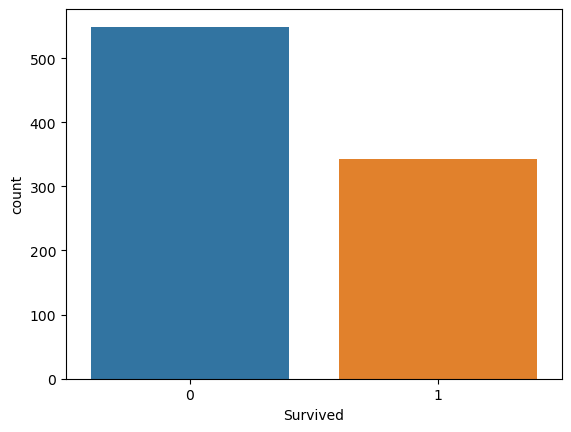

In [19]:
sns.countplot(x = train.Survived)

### Pclass vs. Survival

Higher class passengers have better survival chance.

In [20]:
train.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [21]:
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

In [22]:
train[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [23]:
train.groupby('Pclass')['Survived'].mean()*100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [24]:
train.groupby('Pclass')[['Survived','Fare']].mean()

,Survived,Fare
Pclass,,
1,0.629630,84.154687
2,0.472826,20.662183
3,0.242363,13.675550


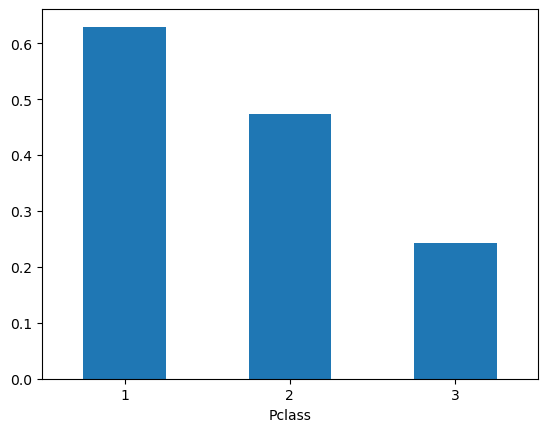

In [25]:
train.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

# Sex vs Survival
Females has better survival chance.

In [26]:
train.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [27]:
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [28]:
train[['Sex','Survived']].groupby(['Sex'],as_index=True).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [29]:
train.groupby('Sex')['Survived'].mean()*100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

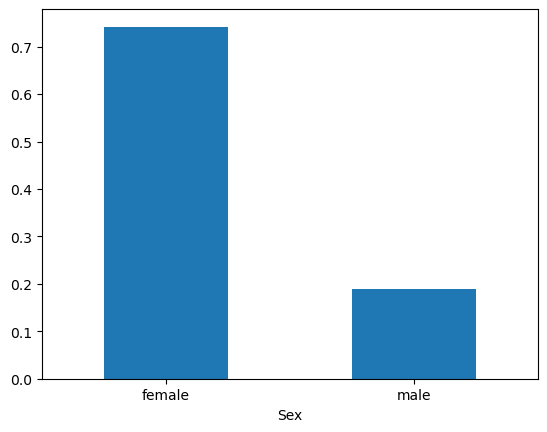

In [30]:
train.groupby('Sex').Survived.mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

#### Now will perform multi-variate analysis using Pclass & Sex vs Survival

### Pclass & Sex vs Survival

Below, we just find out how many males and females are there in each *Pclass*. We then plot a stacked bar diagram with that information. We found that there are more males among the 3rd Pclass passengers.

In [31]:
tab = pd.crosstab(train['Pclass'],train['Sex'])
tab

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [32]:
tab.sum(0)

Sex
female    314
male      577
dtype: int64

In [33]:
tab.sum(1)

Pclass
1    216
2    184
3    491
dtype: int64

In [34]:
pd.crosstab(index = [train.Survived,train.Pclass], columns = [train.Sex])

Sex              female  male
Survived Pclass              
0        1            3    77
         2            6    91
         3           72   300
1        1           91    45
         2           70    17
         3           72    47

In [35]:
94/216

0.4351851851851852

In [36]:
tab.sum(1)

Pclass
1    216
2    184
3    491
dtype: int64

In [37]:
tab.sum(0)

Sex
female    314
male      577
dtype: int64

In [38]:
tab.div(tab.sum(1),)

,female,male,1,2,3
Pclass,,,,,
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN


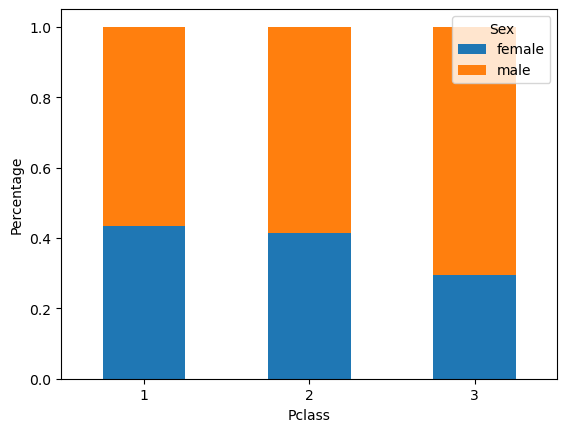

In [39]:
tab.div(tab.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,)
plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.show()

In [40]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


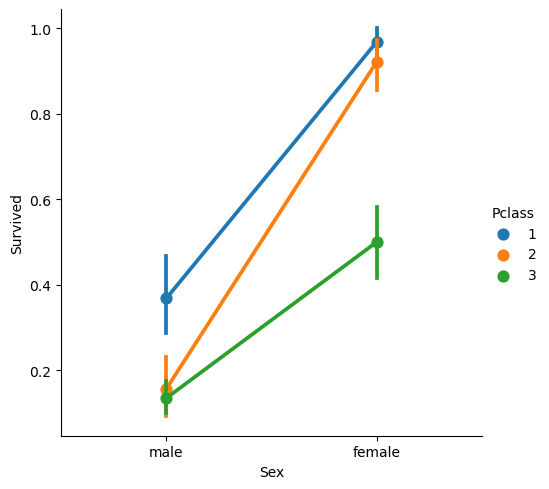

In [41]:
sns.catplot(x = 'Sex',y = 'Survived',hue='Pclass',kind = 'point',data=train)

From the above plot, it can be seen that:
- Women from 1st and 2nd Pclass have almost 100% survival chance. 
- Men from 2nd and 3rd Pclass have only around 10% survival chance.

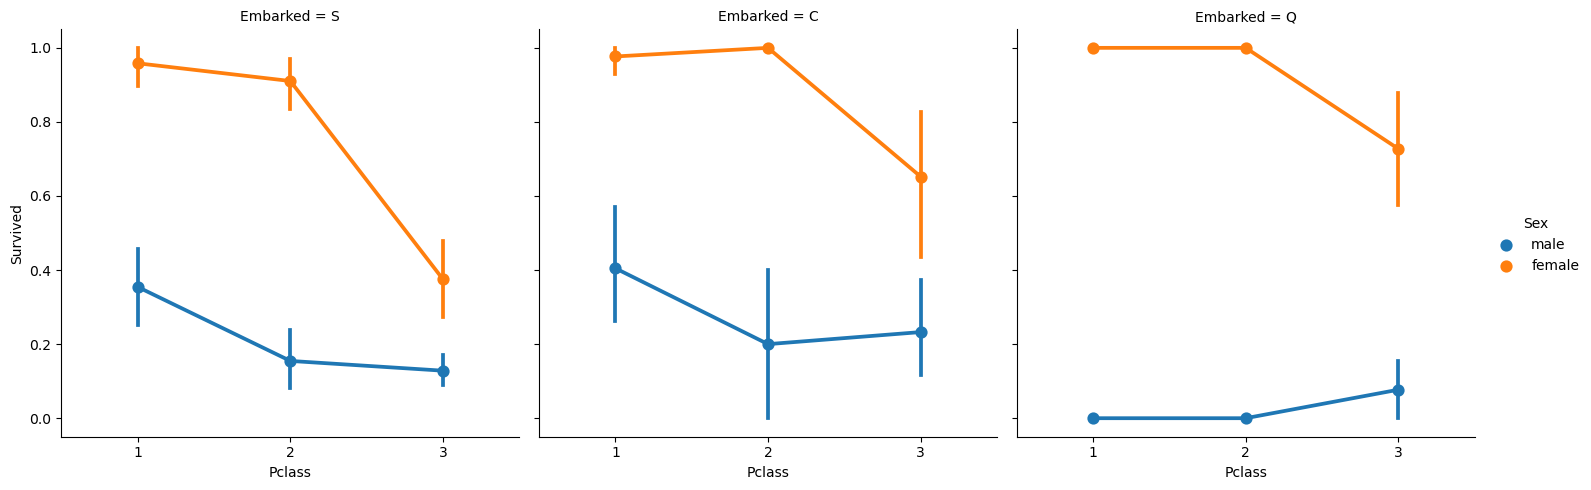

In [42]:
sns.catplot(x = 'Pclass',y = 'Survived',hue='Sex',col = 'Embarked',kind = 'point',data=train)

In [43]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

From the above plot, it can be seen that:
- Almost all females from Pclass 1 and 2 survived.
- Females dying were mostly from 3rd Pclass.
- Males from Pclass 1 only have slightly higher survival chance than Pclass 2 and 3.

### Embarked vs Survived

In [44]:
train.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [45]:
train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: count, dtype: int64

In [46]:
train[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


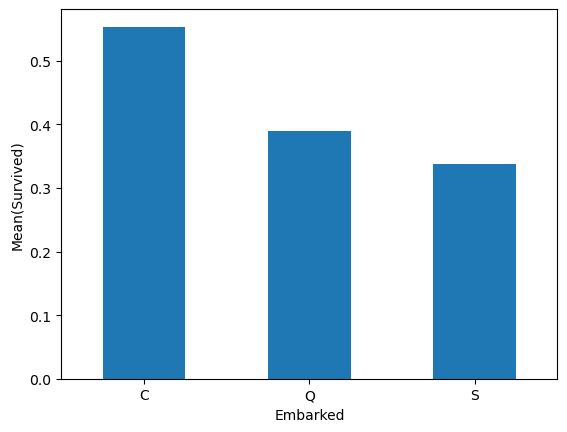

In [47]:
train.groupby('Embarked').Survived.mean().plot(kind='bar')
plt.ylabel('Mean(Survived)')
plt.xticks(rotation=0)
plt.show()

### Parch vs. Survival

In [48]:
train.Parch.value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [49]:
train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: count, dtype: int64

In [50]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


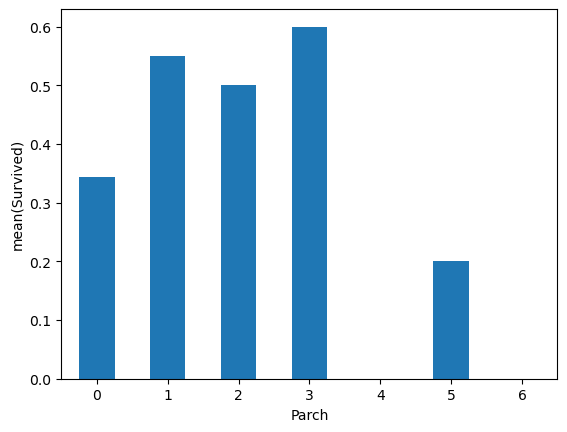

In [51]:
train.groupby('Parch').Survived.mean().plot(kind='bar')
plt.ylabel('mean(Survived)')
plt.xticks(rotation=0)
plt.show()

### SibSp vs. Survival

In [52]:
train.SibSp.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [53]:
train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: count, dtype: int64

In [54]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


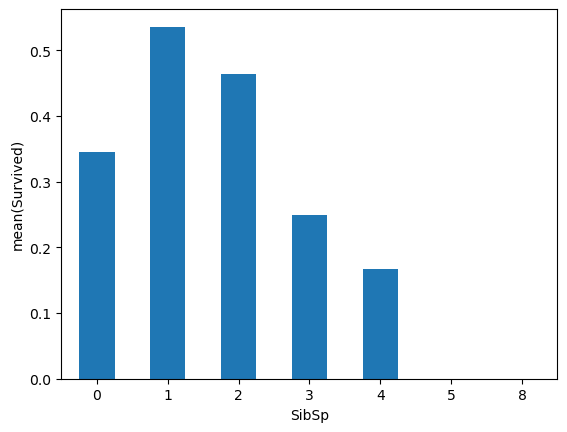

In [55]:
train.groupby('SibSp').Survived.mean().plot(kind='bar')
plt.ylabel('mean(Survived)')
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='Sex', ylabel='Age'>

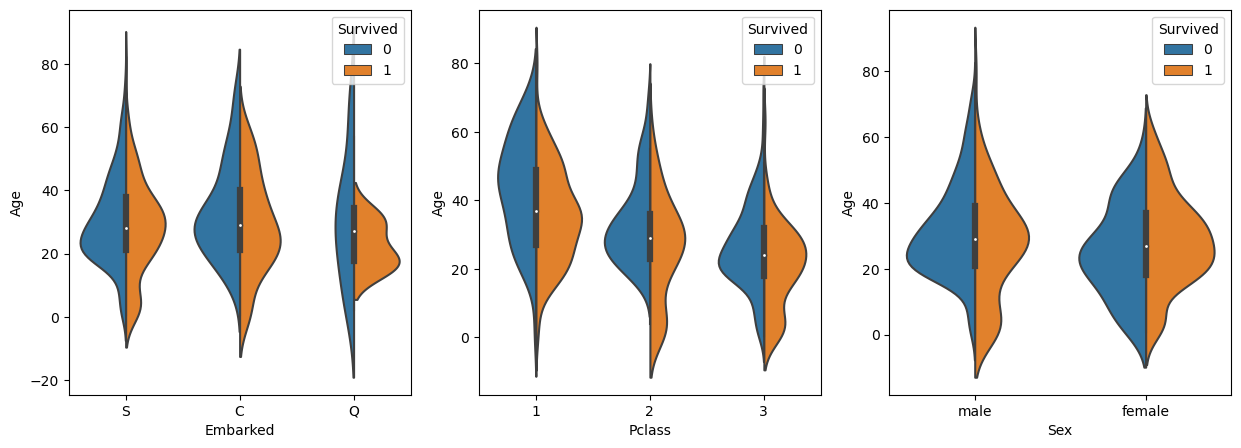

In [56]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Embarked", y="Age", hue="Survived", data=train, split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train, split=True, ax=ax3)


In [57]:
train.Age[train.Age<0]

Series([], Name: Age, dtype: float64)

From *Pclass* violinplot, we can see that:
- 1st Pclass has very few children as compared to other two classes.
- 1st Plcass has more old people as compared to other two classes.
- Almost all children (between age 0 to 10) of 2nd Pclass survived.
- Most children of 3rd Pclass survived.
- Younger people of 1st Pclass survived as compared to its older people.

From *Sex* violinplot, we can see that:
- Most male children (between age 0 to 14) survived.
- Females with age between 18 to 40 have better survival chance.

From *Embarked* Violinplot, we can see that:
- Almost all the Passengers from Embarked Q (Age greater than 40) has low survival rate

### Correlating Features

In [58]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


<Axes: >

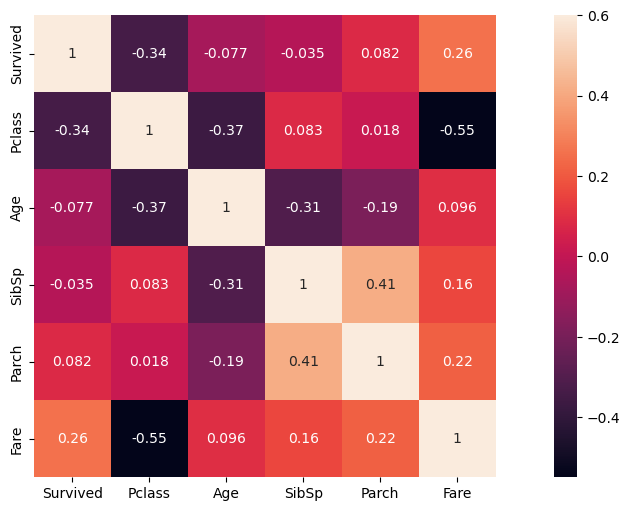

In [59]:
plt.figure(figsize=(15,6))
sns.heatmap(train.drop(['PassengerId','Name','Sex','Ticket','Cabin','Embarked'],axis=1).corr(),vmax=0.6,square=True,annot=True)

In [60]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [61]:
train_dup = train.copy()

In [62]:
test_dup = test.copy()

### Droping Irrelevent columns

In [63]:
train.drop(['PassengerId','Ticket'],axis=1,inplace=True)

In [64]:
test.drop(['PassengerId','Ticket'],axis=1,inplace=True)

In [65]:
null_counts = train.isnull().sum()
null_counts[null_counts>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [66]:
train.shape

(891, 10)

In [67]:
687/891

0.7710437710437711

#### Cabin has more than 75% of null values, In the dataset if we have more than 75% of null values it doesn't provide significant information for prediction so its better to drop those features

In [68]:
train.drop('Cabin',axis =1,inplace=True)

In [69]:
test.drop('Cabin',axis =1,inplace=True)

### Imputing the null values present in the Age and Embarked column

<Axes: ylabel='Frequency'>

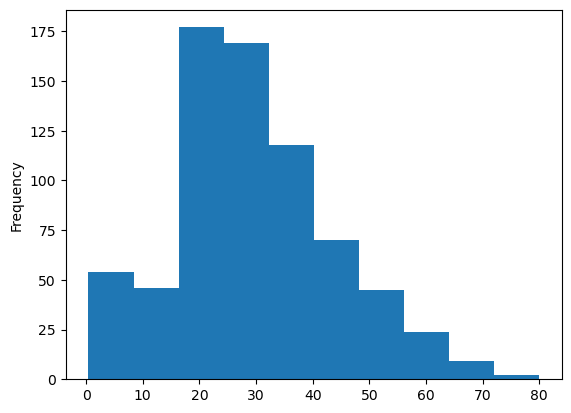

In [70]:
train.Age.plot(kind = 'hist')

### we can see that the age is normaly distributed, so we can go with mean imputation

In [71]:
round(train['Age'].mean(),0)

30.0

In [72]:
train['Age'].median()

28.0

In [73]:
train['Age'] = train.Age.fillna(round(train.Age.mean(),0))

In [74]:
print(train.Age.min(),train.Age.max())

0.42 80.0


### SibSp & Parch Feature

Combining *SibSp* & *Parch* feature, we create a new feature named *FamilySize*.

In [75]:
train['FamilySize'] = train['SibSp']+train.Parch + 1  #this process is called preprocessing steps

In [76]:
train[['FamilySize','Survived']].groupby(['FamilySize'], as_index = False).mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


data shows that: 

- Having *FamilySize* upto 4 (from 2 to 4) has better survival chance. 
- *FamilySize = 1*, i.e. travelling alone has less survival chance.
- Large *FamilySize* (size of 5 and above) also have less survival chance.

### Now will perform some encoding technique

In [77]:
train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2


In [78]:
cols = pd.get_dummies(train[['Sex','Embarked']],drop_first = True).astype('int')

In [79]:
final_train = pd.concat([train,cols],axis=1)

In [80]:
final_train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,0,0


In [81]:
test.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S


In [82]:
colstest = pd.get_dummies(test[['Sex','Embarked']],drop_first = True).astype('int')

In [83]:
final_test = pd.concat([test,colstest],axis=1)

In [84]:
final_test.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_male,Embarked_Q,Embarked_S
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,1,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,0,0,1


### Now will keep only required feature for building the model

In [85]:
final_train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,0,0


In [86]:
X = final_train.drop(['Name','Sex','Embarked','FamilySize','Survived'],axis=1)

In [87]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [88]:
y = final_train['Survived']

In [89]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

In [90]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(623, 8) (268, 8) (623,) (268,)


In [91]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [92]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
114,3,17.0,0,0,14.4583,0,0,0
874,2,28.0,1,0,24.0000,0,0,0
76,3,30.0,0,0,7.8958,1,0,1
876,3,20.0,0,0,9.8458,1,0,1
674,2,30.0,0,0,0.0000,1,0,1


In [93]:
# Predicting for training and testing 
ytrain_pred = clf.predict(X_train)
ytest_pred = clf.predict(X_test)

In [94]:
# Model Evaluation

train_score = clf.score(X_train,y_train)
test_score = clf.score(X_test,y_test)
print(f'Training Score {round(train_score,2)}, Testing Score {round(test_score,2)}')

Training Score 0.82, Testing Score 0.77


In [95]:
y_train.shape

(623,)

In [96]:
347+49+65+162

623

In [97]:
(347+162)/623

0.8170144462279294

In [98]:
confusion_matrix(y_train,ytrain_pred)

array([[347,  49],
       [ 65, 162]], dtype=int64)

In [99]:
y_test.shape

(268,)

In [100]:
(128+79)/268

0.7723880597014925

In [101]:
confusion_matrix(y_test,ytest_pred)

array([[128,  25],
       [ 36,  79]], dtype=int64)

Support :- The number of samples each metrics was calculated on. 


Macro Average:- The Average of Precision, recall and F1 Score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, you must focus on Macro Avg          


Weighted Average:- The Weighted average of precision, recall and F1 Score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favor the majority class.


Macro-average:

Calculation: It is computed by taking the average of the performance metric (e.g., precision, recall, F1-score) across all classes without considering class imbalance.
Use Case: Useful when you want to treat each class equally, regardless of their representation in the dataset. It gives the same weight to each class, which is suitable when all classes are considered equally important.
Weighted-average:

Calculation: It is calculated by taking the average of the metric, but each class's contribution is weighted by its proportion in the dataset.
Use Case: Useful when there is a class imbalance in the dataset. If some classes are underrepresented or overrepresented, the weighted average gives more importance to the metrics of the classes with a larger representation in the dataset.
For logistic regression, these metrics are often used to assess the model's overall performance in a multi-class setting. The choice between macro and weighted average depends on the specific goals of your analysis and the characteristics of your dataset. If all classes are equally important, macro-average might be more appropriate. If class imbalance is a concern, then weighted average may provide a more realistic reflection of overall performance.

In summary, both macro-average and weighted-average are tools for summarizing the performance of a classification model across multiple classes, and the choice between them depends on your specific objectives and the characteristics of your data.

In [102]:
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       396
           1       0.77      0.71      0.74       227

    accuracy                           0.82       623
   macro avg       0.81      0.79      0.80       623
weighted avg       0.82      0.82      0.82       623



In [103]:
y_train.value_counts()

Survived
0    396
1    227
Name: count, dtype: int64

In [104]:
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       153
           1       0.76      0.69      0.72       115

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [105]:
fpr,tpr,thresholds = roc_curve(y_train,ytrain_pred)  # Calculate ROC curve

In [106]:
roc_auc = auc(fpr,tpr)      # Calculate AUC

In [107]:
print("AUC = ",roc_auc)

AUC =  0.7949595069639124


In [108]:
(347/(347+94))

0.7868480725623582

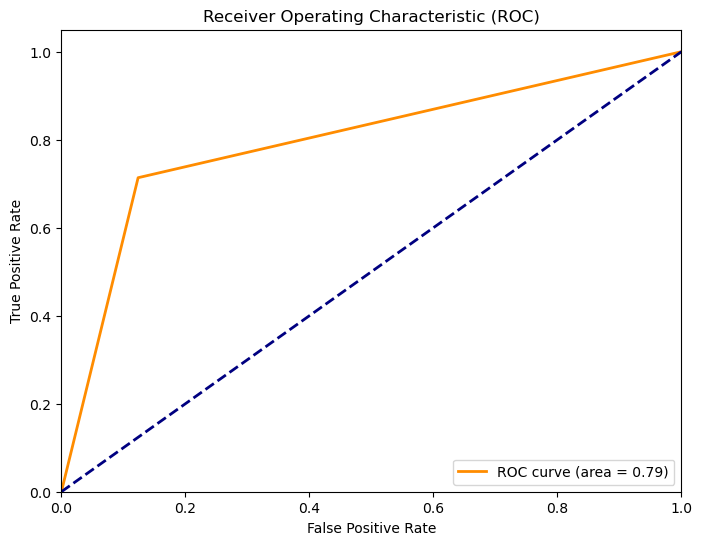

In [109]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

------------------------------ checking for test dataset --------------------------------------------

In [110]:
X_train.head(2)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
114,3,17.0,0,0,14.4583,0,0,0
874,2,28.0,1,0,24.0000,0,0,0


In [111]:
final_test.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_male,Embarked_Q,Embarked_S
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,1,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,0,0,1


In [112]:
final_test1 = final_test.drop(['Name','Sex','Embarked'],axis=1)

### we want to treat the null values present in the test set

In [113]:
final_test1.isnull().sum()

Pclass         0
Age           86
SibSp          0
Parch          0
Fare           1
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

<Axes: ylabel='Frequency'>

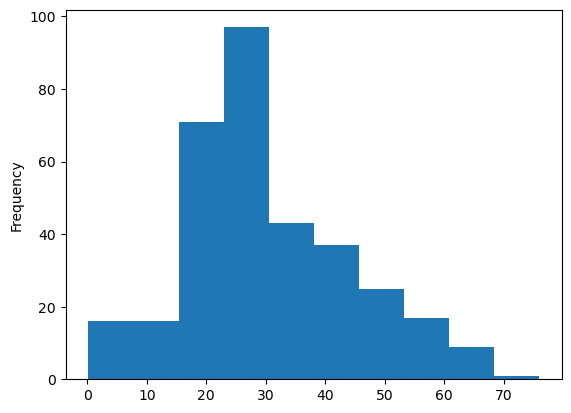

In [114]:
final_test1.Age.plot(kind = 'hist')

In [115]:
round(final_test1.Age.mean(),0)

30.0

In [116]:
final_test1['Age'] = final_test1.Age.fillna(round(final_test1.Age.mean(),0))

In [117]:
final_test1.shape

(418, 8)

In [118]:
final_test1.Fare.median()

14.4542

In [119]:
final_test1['Fare'] = final_test1.Fare.fillna(final_test1.Fare.median())

In [120]:
clf.predict(final_test1)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [121]:
clf.predict_proba(final_test1)

array([[0.88274119, 0.11725881],
       [0.70776634, 0.29223366],
       [0.87142513, 0.12857487],
       [0.91843149, 0.08156851],
       [0.42929104, 0.57070896],
       [0.86827898, 0.13172102],
       [0.30427082, 0.69572918],
       [0.78872105, 0.21127895],
       [0.28236914, 0.71763086],
       [0.94220966, 0.05779034],
       [0.92717555, 0.07282445],
       [0.67732813, 0.32267187],
       [0.07546108, 0.92453892],
       [0.95183569, 0.04816431],
       [0.17670207, 0.82329793],
       [0.16746196, 0.83253804],
       [0.69066913, 0.30933087],
       [0.86423089, 0.13576911],
       [0.51522945, 0.48477055],
       [0.54500101, 0.45499899],
       [0.75539822, 0.24460178],
       [0.82184905, 0.17815095],
       [0.07096298, 0.92903702],
       [0.3281032 , 0.6718968 ],
       [0.11557905, 0.88442095],
       [0.97530785, 0.02469215],
       [0.03439528, 0.96560472],
       [0.87132562, 0.12867438],
       [0.63186175, 0.36813825],
       [0.94471692, 0.05528308],
       [0.

In [122]:
pd.DataFrame(clf.predict_proba(final_test1))

,0,1
0,0.882741,0.117259
1,0.707766,0.292234
2,0.871425,0.128575
3,0.918431,0.081569
4,0.429291,0.570709
...,...,...
413,0.927187,0.072813
414,0.080236,0.919764
415,0.947542,0.052458
416,0.927187,0.072813


# DECISION TREE

In [123]:
y.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [124]:
y.value_counts(normalize = True) *100 

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

In [125]:
from sklearn.tree import DecisionTreeClassifier

In [126]:
# will simply spilt the data into training and testing test set and build the model

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

model1=DecisionTreeClassifier(random_state=42)
model1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [127]:
X.columns.to_list()

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Sex_male',
 'Embarked_Q',
 'Embarked_S']

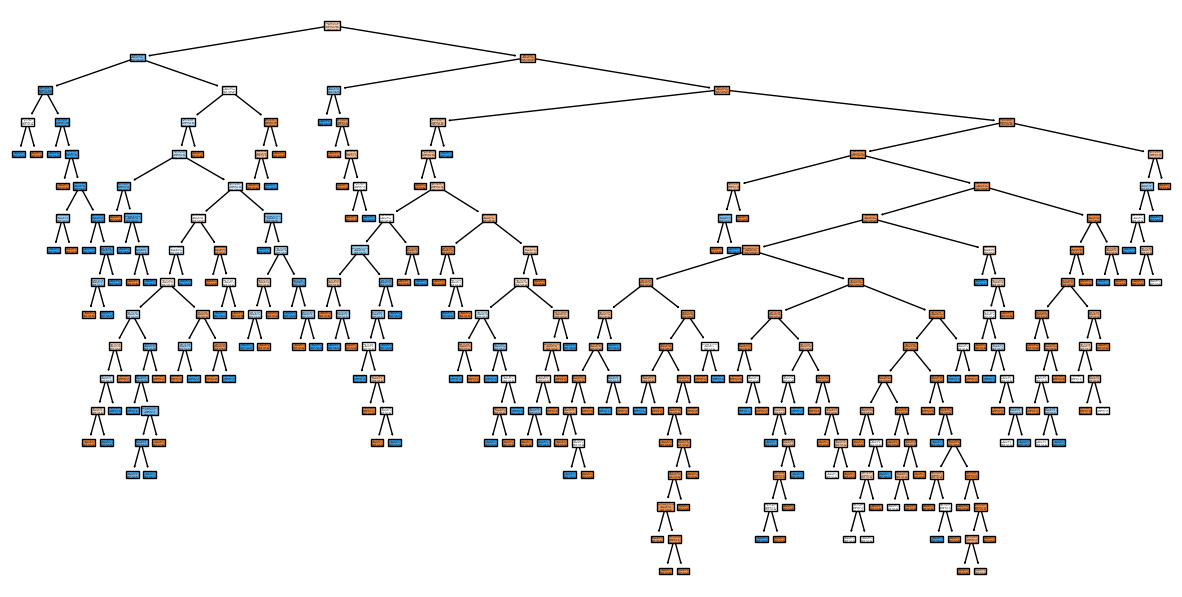

<Figure size 640x480 with 0 Axes>

In [128]:
# Note will plot the tree and see its depth
from sklearn.tree import plot_tree
plt.figure(figsize=(15,7.5))
plot_tree(model1,filled=True,class_names=['No HD','Yes HD'],feature_names=X.columns.to_list())
plt.show()
plt.savefig('image')


In [129]:
# Predicting for training and testing 
ytrain_pred = model1.predict(X_train)
ytest_pred = model1.predict(X_test)

In [130]:
# Model Evaluation

train_score = model1.score(X_train,y_train)   # overfitting
test_score = model1.score(X_test,y_test)
print(f'Training Score {round(train_score,2)}, Testing Score {round(test_score,2)}')

Training Score 0.98, Testing Score 0.76


In [131]:
confusion_matrix(y_train,ytrain_pred)

array([[414,   1],
       [ 12, 241]], dtype=int64)

In [132]:
y_test.value_counts()

Survived
0    134
1     89
Name: count, dtype: int64

In [133]:
confusion_matrix(y_test,ytest_pred)

array([[108,  26],
       [ 28,  61]], dtype=int64)

In [134]:
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       415
           1       1.00      0.95      0.97       253

    accuracy                           0.98       668
   macro avg       0.98      0.98      0.98       668
weighted avg       0.98      0.98      0.98       668



In [135]:
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       134
           1       0.70      0.69      0.69        89

    accuracy                           0.76       223
   macro avg       0.75      0.75      0.75       223
weighted avg       0.76      0.76      0.76       223



In [136]:
a = model1.cost_complexity_pruning_path(X_train,y_train) 
a

{'ccp_alphas': array([0.00000000e+00, 0.00000000e+00, 2.67322498e-05, 4.15834997e-05,
        1.24750499e-04, 1.45542249e-04, 2.49500998e-04, 2.99401198e-04,
        3.39437404e-04, 3.74251497e-04, 4.53638178e-04, 4.99001996e-04,
        4.99001996e-04, 4.99001996e-04, 4.99001996e-04, 5.98802395e-04,
        7.98403194e-04, 8.55431993e-04, 8.98203593e-04, 8.98203593e-04,
        8.98203593e-04, 9.07276356e-04, 9.36276877e-04, 9.79522437e-04,
        9.84872361e-04, 9.98003992e-04, 9.98003992e-04, 1.08117099e-03,
        1.18512974e-03, 1.24750499e-03, 1.27540971e-03, 1.28314799e-03,
        1.28314799e-03, 1.33385840e-03, 1.35241500e-03, 1.37225549e-03,
        1.40344311e-03, 1.40344311e-03, 1.41383899e-03, 1.43703820e-03,
        1.55938124e-03, 1.79825242e-03, 1.90873290e-03, 1.91923845e-03,
        1.99600798e-03, 1.99600798e-03, 2.05303678e-03, 2.24550898e-03,
        2.32227852e-03, 2.33299634e-03, 2.37318006e-03, 2.53065298e-03,
        2.56620440e-03, 2.61976048e-03, 2.72668948

In [137]:
a['ccp_alphas'][0:-1]

array([0.00000000e+00, 0.00000000e+00, 2.67322498e-05, 4.15834997e-05,
       1.24750499e-04, 1.45542249e-04, 2.49500998e-04, 2.99401198e-04,
       3.39437404e-04, 3.74251497e-04, 4.53638178e-04, 4.99001996e-04,
       4.99001996e-04, 4.99001996e-04, 4.99001996e-04, 5.98802395e-04,
       7.98403194e-04, 8.55431993e-04, 8.98203593e-04, 8.98203593e-04,
       8.98203593e-04, 9.07276356e-04, 9.36276877e-04, 9.79522437e-04,
       9.84872361e-04, 9.98003992e-04, 9.98003992e-04, 1.08117099e-03,
       1.18512974e-03, 1.24750499e-03, 1.27540971e-03, 1.28314799e-03,
       1.28314799e-03, 1.33385840e-03, 1.35241500e-03, 1.37225549e-03,
       1.40344311e-03, 1.40344311e-03, 1.41383899e-03, 1.43703820e-03,
       1.55938124e-03, 1.79825242e-03, 1.90873290e-03, 1.91923845e-03,
       1.99600798e-03, 1.99600798e-03, 2.05303678e-03, 2.24550898e-03,
       2.32227852e-03, 2.33299634e-03, 2.37318006e-03, 2.53065298e-03,
       2.56620440e-03, 2.61976048e-03, 2.72668948e-03, 2.86471659e-03,
      

In [140]:
path=model1.cost_complexity_pruning_path(X_train,y_train)    # determine values for alpha
ccp_alphas= path.ccp_alphas   # extract different values for alpha
ccp_alphas = ccp_alphas[:-1]  # extract the maximum value for alpha

In [141]:
len(ccp_alphas)

66

In [142]:
models =[]  # create an array that we will put decision trees into

## now create one decision tree per value for alpha and store it in the array
for i in ccp_alphas:
    model2=DecisionTreeClassifier(random_state=0,ccp_alpha=i)
    model2.fit(X_train,y_train)
    models.append(model2)

In [143]:
# Now the Model has trained with different alpha values
models

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=2.6732249786141655e-05, random_state=0),
 DecisionTreeClassifier(ccp_alpha=4.1583499667332234e-05, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.00012475049900199583, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.00014554224883566195, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0002495009980039921, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0002994011976047903, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.00033943740426124617, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.00037425149700598794, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0004536381781890769, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0004990019960079838, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0004990019960079838, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0004990019960079838, random_state=0),
 DecisionTreeClassifier(

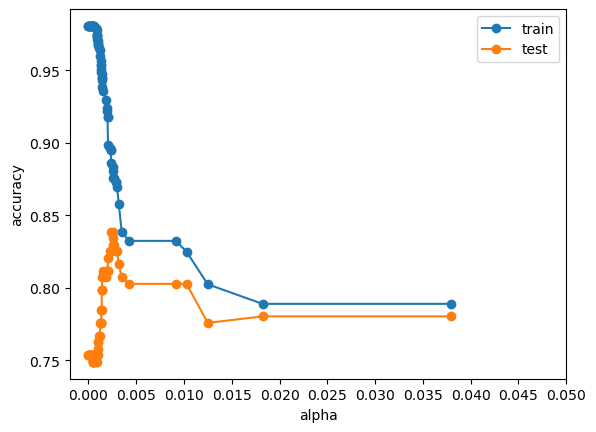

In [144]:
train_scores=[model.score(X_train,y_train) for model in models]
test_scores=[model.score(X_test,y_test) for model in models]


plt.plot(ccp_alphas,train_scores,marker='o',label='train')
plt.plot(ccp_alphas,test_scores,marker='o',label='test')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.xticks([0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045,0.05])

plt.legend()
plt.show()

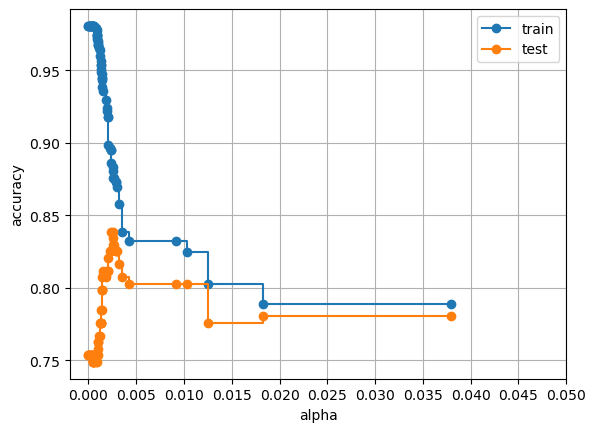

In [145]:
train_scores=[model.score(X_train,y_train) for model in models]
test_scores=[model.score(X_test,y_test) for model in models]


plt.plot(ccp_alphas,train_scores,marker='o',label='train',drawstyle='steps-post')
plt.plot(ccp_alphas,test_scores,marker='o',label='test',drawstyle='steps-post')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.xticks([0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045,0.05])
plt.grid()
plt.legend()
plt.show()

In [146]:
model3 = DecisionTreeClassifier(random_state=42,ccp_alpha=0.0042)

In [147]:
model3.fit(X_train,y_train)
train_score = model3.score(X_train,y_train)
test_score = model3.score(X_test,y_test)
print(f'Training Score {round(train_score,2)}, Testing Score {round(test_score,2)}')

Training Score 0.84, Testing Score 0.81


In [153]:
confusion_matrix(y_train,ytrain_pred)

array([[414,   1],
       [ 12, 241]], dtype=int64)

In [148]:
from sklearn.model_selection import cross_val_score

<Axes: xlabel='tree'>

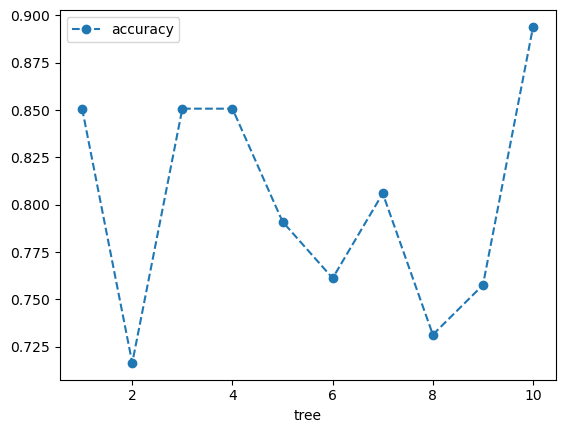

In [149]:
# now use 5-fold cross validation create 10 different training and testing datasets that are then used to train and test tree.
## Note:- We use 5-fold because we don't have tons of data..
scores=cross_val_score(model3,X_train,y_train,cv=10)
df=pd.DataFrame(data={'tree':range(1,11),'accuracy':scores})

df.plot(x='tree',y='accuracy',marker='o',linestyle='--')

In [150]:
(scores).mean()

0.8009724106739032

In [151]:
scores

array([0.85074627, 0.71641791, 0.85074627, 0.85074627, 0.79104478,
       0.76119403, 0.80597015, 0.73134328, 0.75757576, 0.89393939])

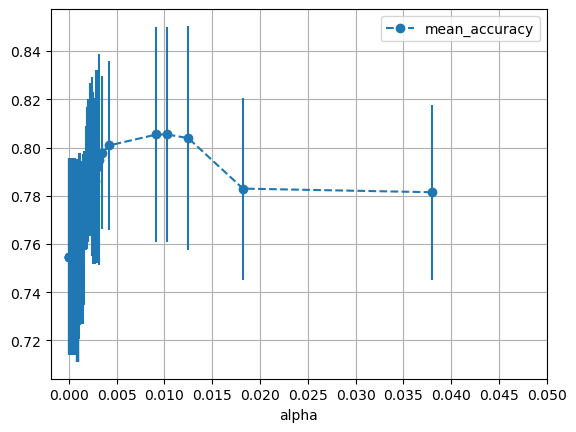

In [171]:
# create an array to store the results of each fold during cross validations
alpha_loop_values=[]

## For each candidate value for alpha, we will run 5-fold cross validation.
## Then we will store the mean and standard deviation of the scores (The accuracy) for each call to cross_val_score in alpha_loop_values

for i in ccp_alphas:
    model4=DecisionTreeClassifier(random_state=0,ccp_alpha=i)
    scores=cross_val_score(model4,X_train,y_train,cv=5)
    alpha_loop_values.append([i,np.mean(scores),np.std(scores)])
    
## Now we can draw a graph of the means and standard deviations of the scores for each candidate  value for alpha

alpha_results = pd.DataFrame(alpha_loop_values,columns=['alpha','mean_accuracy','std'])

alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--')
plt.xticks([0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045,0.05])
plt.grid()
plt.show()

In [154]:
alpha_results

,alpha,mean_accuracy,std
0,0.000000,0.754629,0.040860
1,0.000000,0.754629,0.040860
2,0.000027,0.754629,0.040860
3,0.000042,0.754629,0.040860
4,0.000125,0.754629,0.040860
...,...,...,...
61,0.009166,0.805398,0.044493
62,0.010265,0.805398,0.044493
63,0.012489,0.803905,0.046530
64,0.018216,0.782954,0.037713


In [174]:
alpha_results[(alpha_results['alpha']>0.009166) & (alpha_results['alpha']<0.010265)]['alpha'].values

array([0.00916632])

In [175]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha']>0.009166) & (alpha_results['alpha']<0.010265)]['alpha']
ideal_ccp_alpha

61    0.009166
Name: alpha, dtype: float64

In [176]:
ideal_ccp_alpha.values

array([0.00916632])

In [177]:
## Build and train a new decision tree, only this time use the optimal value for alpha

model5=DecisionTreeClassifier(random_state=42,ccp_alpha= 0.00916632)

In [178]:
model5.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.00916632, random_state=42)

In [179]:
ytrain_pred = model5.predict(X_train)
ytest_pred = model5.predict(X_test)

In [180]:
model5.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.00916632, random_state=42)

In [181]:
# Model Evaluation

train_score = model5.score(X_train,y_train)
test_score = model5.score(X_test,y_test)
print(f'Training Score {round(train_score,2)}, Testing Score {round(test_score,2)}')

Training Score 0.83, Testing Score 0.8


In [182]:
confusion_matrix(y_train,ytrain_pred)

array([[373,  42],
       [ 70, 183]], dtype=int64)

In [183]:
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       415
           1       0.81      0.72      0.77       253

    accuracy                           0.83       668
   macro avg       0.83      0.81      0.82       668
weighted avg       0.83      0.83      0.83       668



In [184]:
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       134
           1       0.78      0.70      0.74        89

    accuracy                           0.80       223
   macro avg       0.80      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223



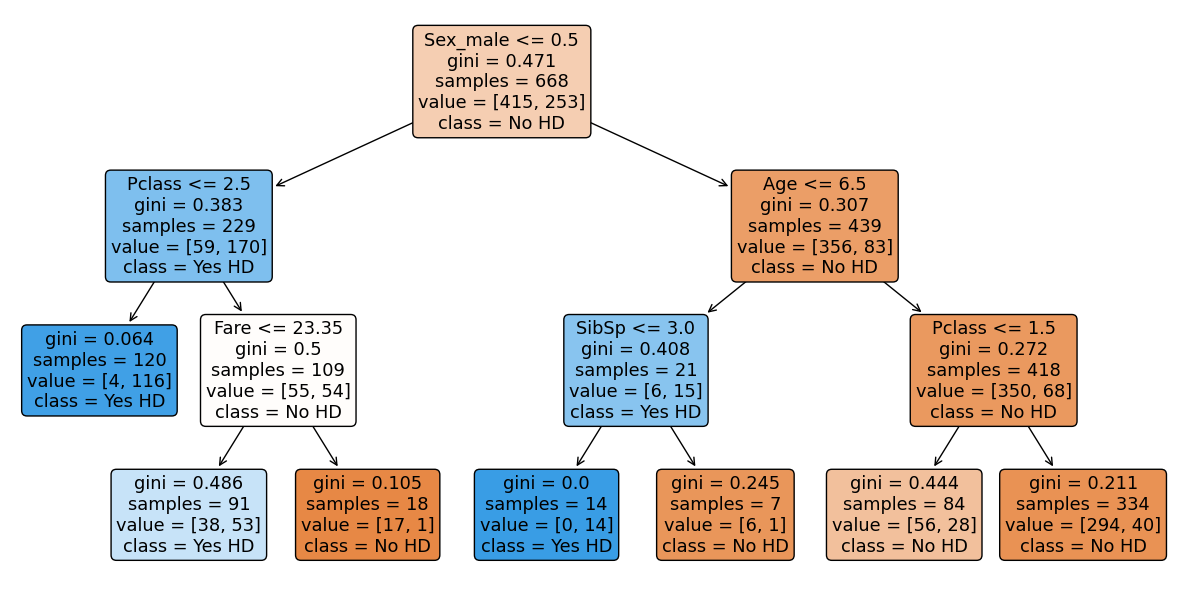

In [185]:
plt.figure(figsize=(15,7.5))
plot_tree(model5,filled=True,rounded=True,class_names=['No HD','Yes HD'],feature_names=X.columns.to_list())
plt.show()